In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [30]:
filename = "/data/xenon/acolijn/G4FastSim/fast/fastsim_max500keV.root"
#filename = "/data/xenon/acolijn/G4FastSim/fast/fastsim_all.root"
#filename = "/data/xenon/acolijn/G4FastSim/fast/fastsim_double.root"

#filename = "/data/xenon/acolijn/G4FastSim/standard/standard.root"

file = uproot.open(filename)
ev = file["ev"].arrays()

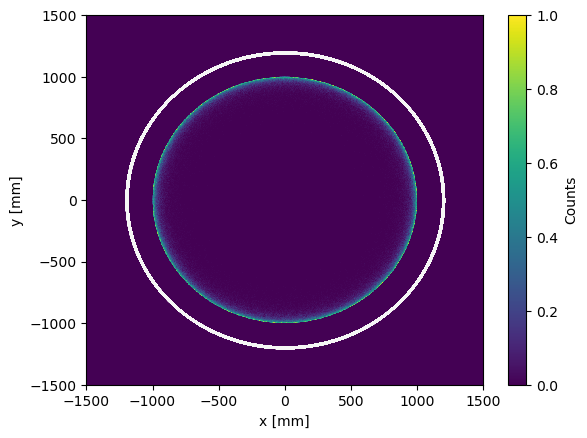

In [41]:

cut = (abs(ev['zp']) < 1000.0)
xh =ak.to_numpy(ak.flatten(ev['xh'][cut]))
yh =ak.to_numpy(ak.flatten(ev['yh'][cut]))
eh =ak.to_numpy(ak.flatten(ev['eh'][cut]))
w = ak.to_numpy(ev['w'][cut])

# I now want a 2D histogram of xh vs yh
h =plt.hist2d(xh,yh, bins=1000,range=((-1500,1500),(-1500,1500)))

# Apply the cut to the data
zcut = (abs(ev['zp']) < 1000.0) 
# Convert 'xp' and 'yp' branches to arrays and apply the boolean mask
xp = ak.to_numpy(ev['xp'][zcut])
yp = ak.to_numpy(ev['yp'][zcut])

# Create scatter plot of primary interaction points
plt.scatter(xp, yp, marker='.', color='white', s=0.02)

plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar(label='Counts')
#plt.xlim(750,1250)
#plt.ylim(-250,250)

#cut = (abs(ev['ev'] <100))
#plt.scatter(ak.to_numpy(ak.flatten(ev['xh'][cut])),ak.to_numpy(ak.flatten(ev['yh'][cut])),marker='.',color='red',s=2)

plt.show()

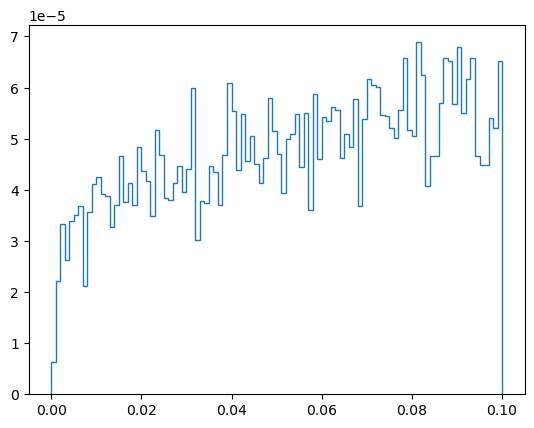

In [37]:
cut = (ev['w']<0)
e = ev['e'][cut]
w = np.exp(ev['w'][cut])

h=plt.hist(e,bins=100,range=(0, 0.1),weights=w, histtype='step')
plt.yscale('linear')


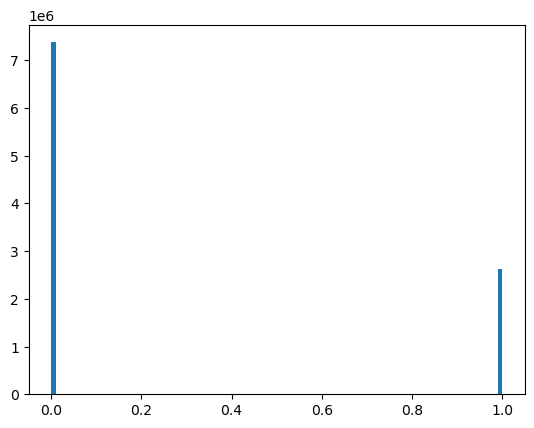

In [33]:
h=plt.hist(ev['nc'],bins=100)

In [34]:
ev['w']

<Array [0, -46, 0, 0, -72.3, ..., -62.9, -69.7, 0, 0] type='10000000 * float64'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data loaded from /data/xenon/acolijn/G4FastSim/fast/fast_pencil.root


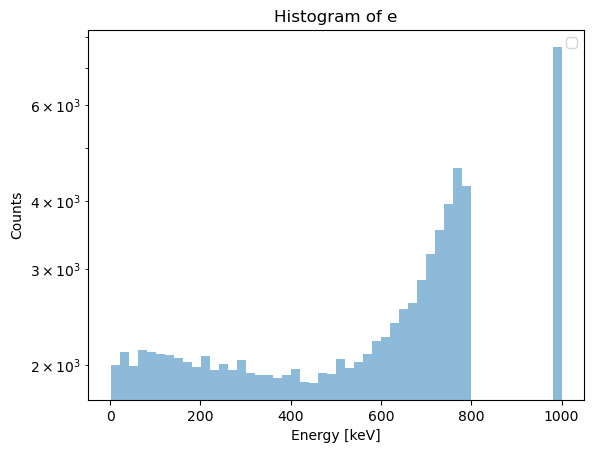

In [8]:
from analyzer import Geant4Analyzer
import matplotlib.pyplot as plt

analyzer_fast = Geant4Analyzer("/data/xenon/acolijn/G4FastSim/fast/fast_pencil.root")
analyzer_fast.preprocess_data()
ax = analyzer_fast.plot_histogram('e', show=False)
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Counts')
ax.set_yscale('log')
plt.show()

In [ ]:
analyzer_fast